# Загрузка  и анализданных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  sklearn.feature_selection import f_classif , mutual_info_classif
from  sklearn.preprocessing import LabelEncoder,  OneHotEncoder , StandardScaler

In [2]:
train = pd.read_csv( 'train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

# Названия признаков и их смысл:
  - client_id - идентификатор клиента
  - education - уровень образования
  - sex - пол заемщика
  - age - возраст заемщика
  - car - флаг наличия автомобиля
  - car_type - флаг автомобиля иномарки
  - decline_app_cnt - количество отказанных прошлых заявок
  - good_work - флаг наличия “хорошей” работы
  - bki_request_cnt - количество запросов в БКИ
  - home_address - категоризатор домашнего адреса
  - work_address - категоризатор рабочего адреса
  - income - доход заемщика
  - foreign_passport - наличие загранпаспорта
  - sna - связь заемщика с клиентами банка
  - first_time - давность наличия информации о заемщике
  - score_bki - скоринговый балл по данным из БКИ
  - region_rating - рейтинг региона
  - app_date - дата подачи заявки
  - default - флаг дефолта по кредиту

In [4]:
# Размеры выборок: Тренировочной, Тестовой и файла Submission
print (train.shape ,test.shape, sample_submission.shape)

(73799, 19) (36349, 18) (36349, 2)


## пропуски

In [5]:
train.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [6]:
test.isna().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

<AxesSubplot:>

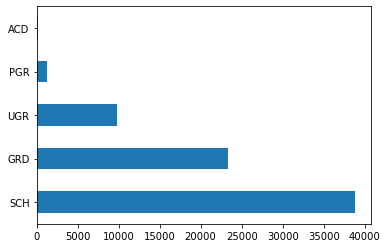

In [7]:
train.education.value_counts().plot.barh()

In [8]:

value = train.education.value_counts().index[0]
train['education'] = train['education'].fillna(value)
test['education'] = test['education'].fillna(value)


In [9]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']

#числовые переменные

num_cols = ['age', 'score_bki', 'decline_app_cnt', 'bki_request_cnt', 'income']



In [10]:
# удаление признаков
train.drop(['client_id','app_date',], axis = 1, inplace=True)
test.drop(['client_id','app_date',], axis = 1, inplace=True)

## числовые переменные

In [11]:
#train, validation = train_test_split(df, test_size=0.33, random_state=42)

In [12]:
train[train['default'] == 1]['age'].mean() > train[train['default'] == 0]['age'].mean()

False

In [13]:
train[train['default'] == 1]['score_bki'].mean() > train[train['default'] == 0]['score_bki'].mean()

True

In [14]:
train[train['default'] == 1]['decline_app_cnt'].mean() > train[train['default'] == 0]['decline_app_cnt'].mean()

True

In [15]:
train[train['default'] == 1]['bki_request_cnt'].mean() > train[train['default'] == 0]['bki_request_cnt'].mean()

True

In [16]:
train[train['default'] == 1]['income'].mean() > train[train['income'] == 0]['income'].mean()

False

/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


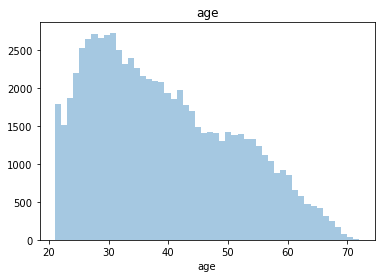

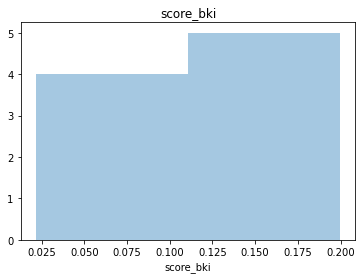

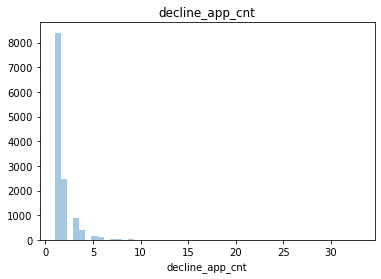

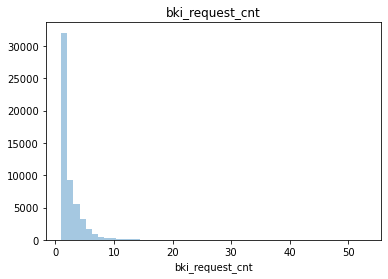

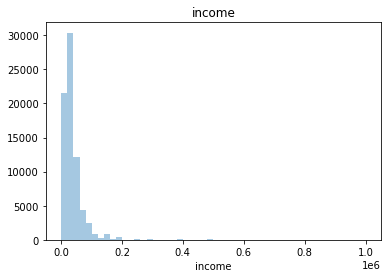

In [17]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

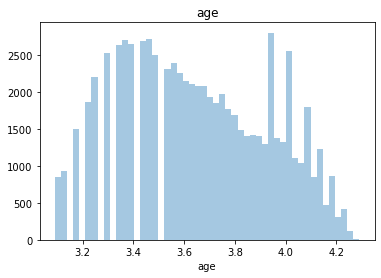

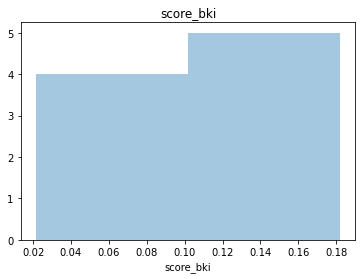

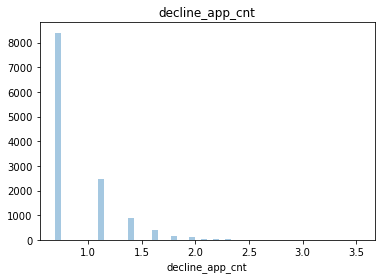

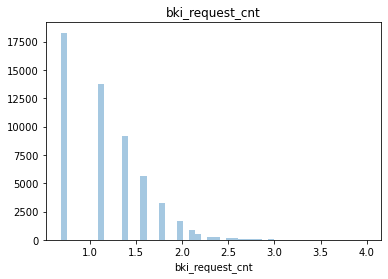

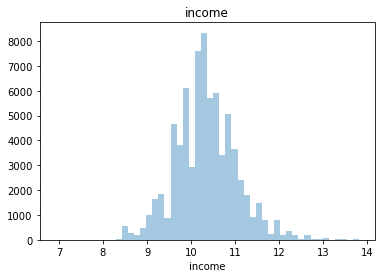

In [18]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna().apply(lambda w: np.log(w + 1)), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [19]:
# логарифмируем некоторые числовые признаки 
train['age'] = np.log(train['age'] + 1)
test['age'] = np.log(test['age'] + 1)

train['decline_app_cnt'] = np.log(train['decline_app_cnt'] + 1)
test['decline_app_cnt'] = np.log(test['decline_app_cnt'] + 1)

train['income'] = np.log(train['income'] + 1)
test['income'] = np.log(test['income'] + 1)

train['bki_request_cnt'] = np.log(train['bki_request_cnt'] + 1)
test['bki_request_cnt'] = np.log(test['bki_request_cnt'] + 1)

<AxesSubplot:>

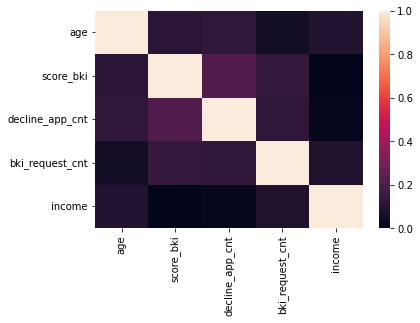

In [20]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

<AxesSubplot:>

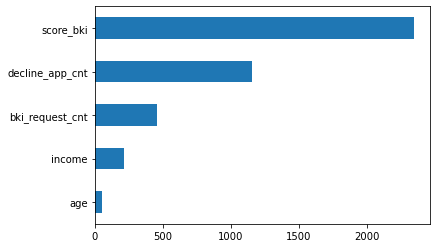

In [21]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [28]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])
    
# убедимся в преобразовании    
train.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,3,1,4.143135,1,1,0.000000,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0
1,3,0,4.094345,0,0,0.000000,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0
2,3,1,3.258097,1,0,1.098612,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0
3,3,0,3.988984,0,0,0.000000,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0
4,1,1,3.891820,0,0,0.000000,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0


<AxesSubplot:>

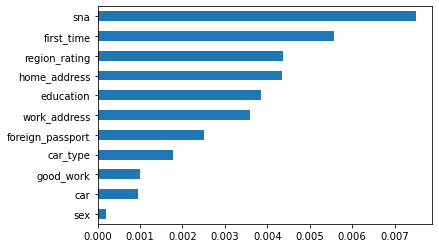

In [29]:
train['education'] = label_encoder.fit_transform(train['education'])
test['education'] = label_encoder.fit_transform(test['education'])

imp_cat = pd.Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [32]:
data_train_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
data_test_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

In [33]:
# Стандартизация числовых переменных

data_train_num = StandardScaler().fit_transform(train[num_cols].values)
data_test_num = StandardScaler().fit_transform(test[num_cols].values)

In [57]:
X = np.hstack([data_train_num, train[bin_cols].values, data_train_cat])
X_valid = np.hstack([data_test_num, test[bin_cols].values, data_test_cat])
y = train['default'].values

In [45]:
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.model_selection import GridSearchCV

# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
model = LogisticRegression()

iter_ = 1000
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 939, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "/Users/ramanzhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/ramanzhuk/opt

	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 1000
	multi_class: 'auto'
	n_jobs: None
	penalty: 'none'
	random_state: None
	solver: 'sag'
	tol: 0.001
	verbose: 0
	warm_start: False


In [48]:
# Создадим модель в оптимальными параметрами, найденными с помощью инструмента GridSearchCV

logreg = LogisticRegression(solver='sag', max_iter=1000, class_weight='balanced', penalty='none',  tol=0.001, )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) 
Y_pred=logreg.predict(X_train)
y_pred_proba=logreg.predict_proba(X_test)
y_pred_proba=y_pred_proba[:,1]
Y_pred_proba=logreg.predict_proba(X_train)
Y_pred_proba=Y_pred_proba[:,1]

In [49]:
# Импортируем все необходимые метрики
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, roc_auc_score, recall_score, confusion_matrix

In [51]:
# Напишем функцию, которая будет отображать нам значения всех метрик на тренировочной выборке и на тестовой
def show_metrics(y_pred_train, Y_train, y_pred_test, Y_test, y_pred_proba_train, y_pred_proba_test):
    f1_score_train=f1_score(y_pred_train,Y_train)
    f1_score_test=f1_score(y_pred_test,Y_test)
    print('[train] f1_score {0:.2f}, [test] f1_score {1:.2f}\n'.format(f1_score_train,f1_score_test))
    precision_score_train=precision_score(y_pred_train,Y_train)
    precision_score_test=precision_score(y_pred_test,Y_test)
    print('[train] precision_score {0:.2f}, [test] precision_score {1:.2f}\n'.format(precision_score_train,precision_score_test))
    recall_score_train=recall_score(y_pred_train,Y_train)
    recall_score_test=recall_score(y_pred_test,Y_test)
    print('[train] recall_score {0:.2f}, [test] recall_score {1:.2f}\n'.format(recall_score_train,recall_score_test))
    accuracy_score_train=accuracy_score(y_pred_train,Y_train)
    accuracy_score_test=accuracy_score(y_pred_test,Y_test)
    print('[train] accuracy_score {0:.2f}, [test] accuracy_score {1:.2f}\n'.format(accuracy_score_train,accuracy_score_test))
    roc_auc_score_train=roc_auc_score(Y_train,y_pred_proba_train)
    roc_auc_score_test=roc_auc_score(Y_test,y_pred_proba_test)
    print('[train] roc_auc_score {0:.2f}, [test] roc_auc_score {1:.2f}\n'.format(roc_auc_score_train,roc_auc_score_test))
    confusion_matrix_train=confusion_matrix(y_pred_train,Y_train)
    confusion_matrix_test=confusion_matrix(y_pred_test,Y_test)
    print('[train] confusion_matrix \n {0}, \n[test] confusion_matrix \n {1}\n'.format(confusion_matrix_train,confusion_matrix_test))

In [52]:
# Проверим, нет ли переобучения модели
show_metrics(Y_pred,y_train,y_pred,y_test,Y_pred_proba,y_pred_proba)

[train] f1_score 0.34, [test] f1_score 0.34

[train] precision_score 0.67, [test] precision_score 0.69

[train] recall_score 0.23, [test] recall_score 0.22

[train] accuracy_score 0.67, [test] accuracy_score 0.67

[train] roc_auc_score 0.73, [test] roc_auc_score 0.74

[train] confusion_matrix 
 [[34215  2485]
 [17279  5060]], 
[test] confusion_matrix 
 [[8572  569]
 [4361 1258]]



NameError: name 'fpr' is not defined

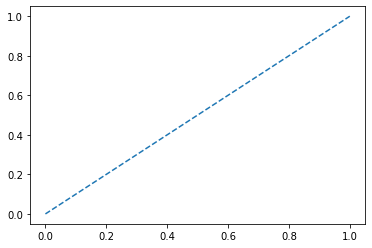

In [60]:
roc_auc=roc_auc_score(y_test,y_pred_proba)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [53]:
# Кажется, переобучения нет. Чтобы проверить это, воспользуемся функцией cross_validate 
# из обучающего модуля

from sklearn.model_selection import cross_validate
cv_metrics = cross_validate(logreg, X, y, cv=5, scoring='f1_micro', return_train_score=True)

def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize=(15, 5))

    plt.plot(cv_metrics['train_score'], label='train', marker='.')
    plt.plot(cv_metrics['test_score'], label='valid', marker='.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize=15)
    plt.ylabel('F1-score', fontsize=15)
    plt.legend(fontsize=15)

[train] F1-score = 0.67 +/- 0.00
[valid] F1-score = 0.67 +/- 0.00


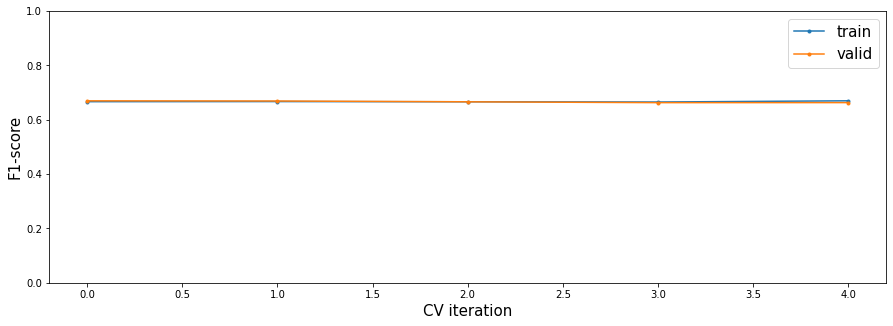

In [54]:
plot_cv_metrics(cv_metrics)
# Похоже, переобучения действительно нет

In [56]:
#  обучаем финальную модель на всех обучающи данных
logreg_final = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced', penalty='l2',tol=0.001, multi_class='ovr')
# logreg_final = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
logreg_final.fit(X, y)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   solver='saga', tol=0.001)

In [62]:
predict_submission = logreg_final.predict(X_valid)
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,0
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0
